# Learning Rate Schedule & Adaptive Gradient Descent Algorithm

* A CNN model is constructed to train on CIFAR-10

* The following learning rate decay schedules are used : constant learning rate, time-based decay, step decay, exponential decay

* The following adaptive graident descent algorithms are used : Adagrad, Adadelta, RMSProp, Adam
    
* Model performance of using different learning rate schedules or adaptive gradient descent algorithms are compared

In [1]:
from __future__ import print_function
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline  

import keras
from keras import backend as K
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam
from keras.models import model_from_json
from keras.callbacks import LearningRateScheduler

Using TensorFlow backend.


# Load CIFAR-10 data

In [2]:
batch_size = 64
num_classes = 2
epochs = 100

# input image dimensions
img_rows, img_cols = 32, 32   

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()   

# Only look at cats [=3] and dogs [=5]
train_picks = np.ravel(np.logical_or(y_train==3,y_train==5))  
test_picks = np.ravel(np.logical_or(y_test==3,y_test==5))     

y_train = np.array(y_train[train_picks]==5,dtype=int)
y_test = np.array(y_test[test_picks]==5,dtype=int)

X_train = X_train[train_picks]
X_test = X_test[test_picks]

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(np.ravel(y_train), num_classes)
y_test = keras.utils.to_categorical(np.ravel(y_test), num_classes)

X_train shape: (10000, 32, 32, 3)
10000 train samples
2000 test samples


# Define function to construct CNN model

In [3]:
def cnn_model() : 
    model = Sequential()
    model.add(Conv2D(4, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
    model.add(Conv2D(8, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    # print(model.summary())
    return(model)

# Define function to plot model accuracy

In [4]:
def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['val_acc'],label='validation')
    plt.plot(range(1,epochs+1),history.history['acc'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
#     plt.ylim([0,1])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    fig.savefig('img/'+str(i)+'-accuracy.jpg')
    plt.close(fig)

# Constant learning rate

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
6s - loss: 0.6928 - acc: 0.5151 - val_loss: 0.6873 - val_acc: 0.5415
Epoch 2/100
6s - loss: 0.6796 - acc: 0.5652 - val_loss: 0.7077 - val_acc: 0.5385
Epoch 3/100
6s - loss: 0.6666 - acc: 0.5918 - val_loss: 0.6614 - val_acc: 0.5910
Epoch 4/100
6s - loss: 0.6563 - acc: 0.6159 - val_loss: 0.6444 - val_acc: 0.6355
Epoch 5/100
6s - loss: 0.6442 - acc: 0.6309 - val_loss: 0.6213 - val_acc: 0.6605
Epoch 6/100
6s - loss: 0.6359 - acc: 0.6417 - val_loss: 0.6312 - val_acc: 0.6365
Epoch 7/100
6s - loss: 0.6311 - acc: 0.6462 - val_loss: 0.6132 - val_acc: 0.6595
Epoch 8/100
6s - loss: 0.6243 - acc: 0.6550 - val_loss: 0.6155 - val_acc: 0.6600
Epoch 9/100
6s - loss: 0.6152 - acc: 0.6577 - val_loss: 0.6032 - val_acc: 0.6635
Epoch 10/100
5s - loss: 0.6111 - acc: 0.6619 - val_loss: 0.6009 - val_acc: 0.6650
Epoch 11/100
6s - loss: 0.6069 - acc: 0.6644 - val_loss: 0.6116 - val_acc: 0.6565
Epoch 12/100
6s - loss: 0.6027 - acc: 0.6746 - val_loss: 0

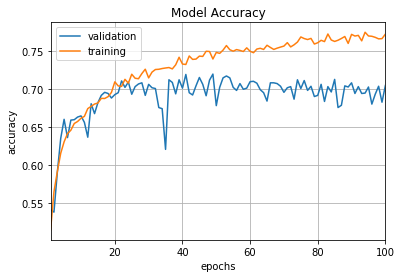

In [5]:
# define CNN model
model1 = cnn_model()

# define SGD optimizer
learning_rate = 0.1
sgd = SGD(lr=learning_rate, momentum=0.0, decay=0.0, nesterov=False) # set to default except lr

# compile the model
model1.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])

# fit the model
history1 = model1.fit(X_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=2,
                validation_data=(X_test, y_test))

# plot model accuracy
plot_fig(1, history1)

# Time-based decay

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
6s - loss: 0.6921 - acc: 0.5194 - val_loss: 0.6911 - val_acc: 0.5075
Epoch 2/100
6s - loss: 0.6788 - acc: 0.5648 - val_loss: 0.6578 - val_acc: 0.6020
Epoch 3/100
6s - loss: 0.6700 - acc: 0.5883 - val_loss: 0.6746 - val_acc: 0.5685
Epoch 4/100
6s - loss: 0.6590 - acc: 0.6052 - val_loss: 0.6523 - val_acc: 0.6130
Epoch 5/100
6s - loss: 0.6526 - acc: 0.6094 - val_loss: 0.6362 - val_acc: 0.6335
Epoch 6/100
6s - loss: 0.6402 - acc: 0.6295 - val_loss: 0.6407 - val_acc: 0.6265
Epoch 7/100
6s - loss: 0.6336 - acc: 0.6412 - val_loss: 0.6278 - val_acc: 0.6430
Epoch 8/100
6s - loss: 0.6246 - acc: 0.6445 - val_loss: 0.6193 - val_acc: 0.6515
Epoch 9/100
6s - loss: 0.6198 - acc: 0.6518 - val_loss: 0.6175 - val_acc: 0.6460
Epoch 10/100
6s - loss: 0.6104 - acc: 0.6582 - val_loss: 0.6129 - val_acc: 0.6445
Epoch 11/100
6s - loss: 0.6065 - acc: 0.6637 - val_loss: 0.6052 - val_acc: 0.6580
Epoch 12/100
6s - loss: 0.5963 - acc: 0.6674 - val_loss: 0

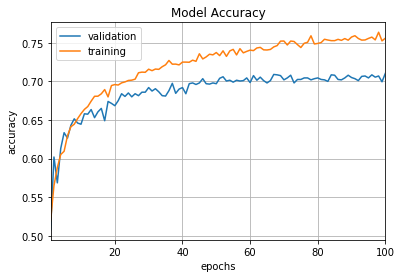

In [6]:
# define CNN model
model2 = cnn_model()

# define SGD optimizer
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.5
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

# compile the model
model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])

# fit the model
history2 = model2.fit(X_train, y_train, 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2, 
                     validation_data=(X_test, y_test))

# plot model accuracy
plot_fig(2, history2)

# Step decay

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
lr: 0.1
6s - loss: 0.6905 - acc: 0.5332 - val_loss: 0.6821 - val_acc: 0.5825
Epoch 2/100
lr: 0.1
6s - loss: 0.6766 - acc: 0.5674 - val_loss: 0.6593 - val_acc: 0.6180
Epoch 3/100
lr: 0.1
6s - loss: 0.6590 - acc: 0.6019 - val_loss: 0.6493 - val_acc: 0.6165
Epoch 4/100
lr: 0.1
6s - loss: 0.6437 - acc: 0.6303 - val_loss: 0.6207 - val_acc: 0.6595
Epoch 5/100
lr: 0.1
6s - loss: 0.6220 - acc: 0.6533 - val_loss: 0.6040 - val_acc: 0.6720
Epoch 6/100
lr: 0.1
6s - loss: 0.6094 - acc: 0.6644 - val_loss: 0.5913 - val_acc: 0.6950
Epoch 7/100
lr: 0.1
6s - loss: 0.5995 - acc: 0.6772 - val_loss: 0.5853 - val_acc: 0.6935
Epoch 8/100
lr: 0.1
6s - loss: 0.5931 - acc: 0.6772 - val_loss: 0.5909 - val_acc: 0.6755
Epoch 9/100
lr: 0.1
6s - loss: 0.5820 - acc: 0.6871 - val_loss: 0.5804 - val_acc: 0.6910
Epoch 10/100
lr: 0.05
6s - loss: 0.5723 - acc: 0.6973 - val_loss: 0.5772 - val_acc: 0.6915
Epoch 11/100
lr: 0.05
6s - loss: 0.5585 - acc: 0.7067 - val

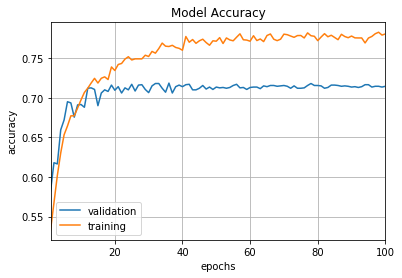

In [7]:
# define CNN model
model3 = cnn_model()

# define SGD optimizer
momentum = 0.5
sgd = SGD(lr=0.0, momentum=momentum, decay=0.0, nesterov=False) 

# compile the model
model3.compile(loss=keras.losses.categorical_crossentropy,optimizer=sgd, metrics=['accuracy'])

# define step decay function
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(step_decay(len(self.losses)))
        print('lr:', step_decay(len(self.losses)))

def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((epoch)/epochs_drop))
    return lrate

# learning schedule callback
loss_history = LossHistory()
lrate = LearningRateScheduler(step_decay)
callbacks_list = [loss_history, lrate]

# fit the model
history3 = model3.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size, 
                     callbacks=callbacks_list, 
                     verbose=2)

# plot model accuracy
plot_fig(3, history3)

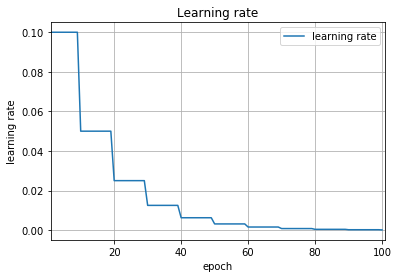

In [8]:
# plot learning rate
fig = plt.figure()
plt.plot(range(1,epochs+1),loss_history.lr,label='learning rate')
plt.xlabel("epoch")
plt.xlim([1,epochs+1])
plt.ylabel("learning rate")
plt.legend(loc=0)
plt.grid(True)
plt.title("Learning rate")
plt.show()
fig.savefig('img/3-learning-rate.jpg')
plt.close(fig)

# Exponential decay

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
lr: 0.0904837418036
6s - loss: 0.6937 - acc: 0.5119 - val_loss: 0.6905 - val_acc: 0.5025
Epoch 2/100
lr: 0.0818730753078
6s - loss: 0.6866 - acc: 0.5392 - val_loss: 0.6788 - val_acc: 0.5810
Epoch 3/100
lr: 0.0740818220682
6s - loss: 0.6774 - acc: 0.5746 - val_loss: 0.6667 - val_acc: 0.5985
Epoch 4/100
lr: 0.0670320046036
6s - loss: 0.6607 - acc: 0.6030 - val_loss: 0.6567 - val_acc: 0.6220
Epoch 5/100
lr: 0.0606530659713
6s - loss: 0.6525 - acc: 0.6197 - val_loss: 0.6471 - val_acc: 0.6290
Epoch 6/100
lr: 0.0548811636094
6s - loss: 0.6457 - acc: 0.6226 - val_loss: 0.6467 - val_acc: 0.6225
Epoch 7/100
lr: 0.0496585303791
6s - loss: 0.6428 - acc: 0.6335 - val_loss: 0.6398 - val_acc: 0.6455
Epoch 8/100
lr: 0.0449328964117
6s - loss: 0.6345 - acc: 0.6341 - val_loss: 0.6410 - val_acc: 0.6410
Epoch 9/100
lr: 0.0406569659741
6s - loss: 0.6276 - acc: 0.6351 - val_loss: 0.6325 - val_acc: 0.6505
Epoch 10/100
lr: 0.0367879441171
6s - loss

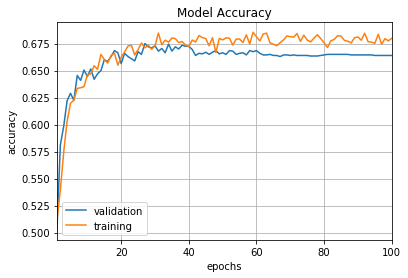

In [9]:
# define CNN model
model4 = cnn_model()

# define SGD optimizer
momentum = 0.8
sgd = SGD(lr=0.0, momentum=momentum, decay=0.0, nesterov=False)

# compile the model
model4.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])

# define step decay function
class LossHistory_(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(exp_decay(len(self.losses)))
        print('lr:', exp_decay(len(self.losses)))

def exp_decay(epoch):
    initial_lrate = 0.1
    k = 0.1
    lrate = initial_lrate * np.exp(-k*epoch)
    return lrate

# learning schedule callback
loss_history_ = LossHistory_()
lrate_ = LearningRateScheduler(exp_decay)
callbacks_list_ = [loss_history_, lrate_]

# fit the model
history4 = model4.fit(X_train, y_train, 
     validation_data=(X_test, y_test), 
     epochs=epochs, 
     batch_size=batch_size, 
     callbacks=callbacks_list_, 
     verbose=2)

# plot model accuracy
plot_fig(4, history4)

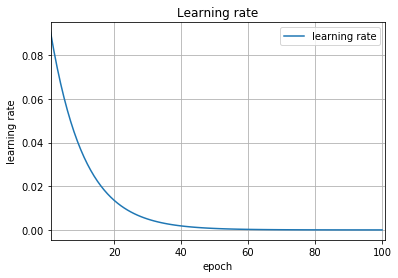

In [10]:
# plot learning rate
fig = plt.figure()
plt.plot(range(1,epochs+1),loss_history_.lr,label='learning rate')
plt.xlabel("epoch")
plt.xlim([1,epochs+1])
plt.ylabel("learning rate")
plt.legend(loc=0)
plt.grid(True)
plt.title("Learning rate")
plt.show()
fig.savefig('img/4-learning-rate.jpg')
plt.close(fig)

# Adaptive gradient descent algorithms : Adagrad, Adadelta, RMSprop, Adam

In [11]:
# fit CNN model using Adagrad optimizer
model5 = cnn_model()
model5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adagrad(lr=0.01, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history5 = model5.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)

# fit CNN model using Adadelta optimizer
model6 = cnn_model()
model6.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history6 = model6.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)

# fit CNN model using RMSprop optimizer
model7 = cnn_model()
model7.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history7 = model7.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)

# fit CNN model using Adam optimizer
model8 = cnn_model()
model8.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history8 = model8.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
6s - loss: 0.6982 - acc: 0.5112 - val_loss: 0.6902 - val_acc: 0.5740
Epoch 2/100
6s - loss: 0.6899 - acc: 0.5308 - val_loss: 0.6891 - val_acc: 0.5590
Epoch 3/100
6s - loss: 0.6887 - acc: 0.5394 - val_loss: 0.6859 - val_acc: 0.5870
Epoch 4/100
6s - loss: 0.6879 - acc: 0.5417 - val_loss: 0.6879 - val_acc: 0.5610
Epoch 5/100
6s - loss: 0.6870 - acc: 0.5476 - val_loss: 0.6843 - val_acc: 0.6030
Epoch 6/100
6s - loss: 0.6851 - acc: 0.5562 - val_loss: 0.6827 - val_acc: 0.5945
Epoch 7/100
6s - loss: 0.6833 - acc: 0.5621 - val_loss: 0.6792 - val_acc: 0.6185
Epoch 8/100
6s - loss: 0.6814 - acc: 0.5761 - val_loss: 0.6768 - val_acc: 0.6180
Epoch 9/100
6s - loss: 0.6797 - acc: 0.5793 - val_loss: 0.6748 - val_acc: 0.6235
Epoch 10/100
6s - loss: 0.6752 - acc: 0.5867 - val_loss: 0.6708 - val_acc: 0.6370
Epoch 11/100
6s - loss: 0.6742 - acc: 0.5936 - val_loss: 0.6666 - val_acc: 0.6435
Epoch 12/100
6s - loss: 0.6721 - acc: 0.6003 - val_loss: 0

# Compare model accuracy

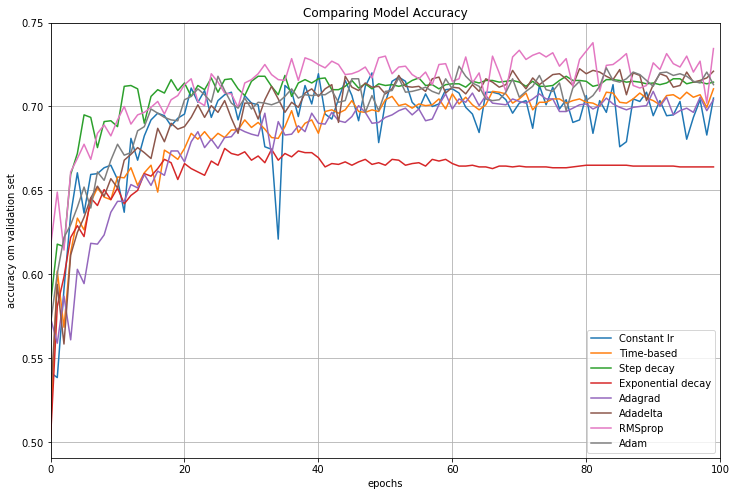

In [12]:
fig = plt.figure(figsize=(12,8))
plt.plot(range(epochs),history1.history['val_acc'],label='Constant lr')
plt.plot(range(epochs),history2.history['val_acc'],label='Time-based')
plt.plot(range(epochs),history3.history['val_acc'],label='Step decay')
plt.plot(range(epochs),history4.history['val_acc'],label='Exponential decay')
plt.plot(range(epochs),history5.history['val_acc'],label='Adagrad')
plt.plot(range(epochs),history6.history['val_acc'],label='Adadelta')
plt.plot(range(epochs),history7.history['val_acc'],label='RMSprop')
plt.plot(range(epochs),history8.history['val_acc'],label='Adam')
plt.legend(loc=0)
plt.xlabel('epochs')
plt.xlim([0,epochs])
plt.ylabel('accuracy om validation set')
plt.grid(True)
plt.title("Comparing Model Accuracy")
plt.show()
fig.savefig('img/compare-accuracy.jpg')
plt.close(fig)